In [2]:
import torch
from torchvision.models.segmentation import deeplabv3_resnet50, DeepLabV3_ResNet50_Weights
model = deeplabv3_resnet50(weights = DeepLabV3_ResNet50_Weights.DEFAULT)
model.eval()


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [3]:
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt

# Load and preprocess image
def preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    input_image = F.to_tensor(image).unsqueeze(0)  # Add batch dimension
    return input_image, image

input_image, raw_image = preprocess_image("/home/com2rng/images/cafe.jpg")



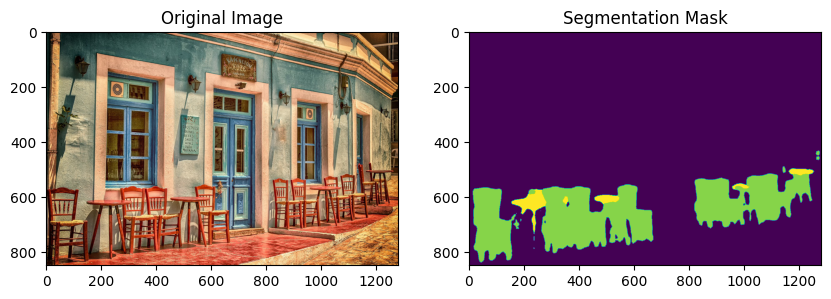

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# Perform inference
with torch.no_grad():
    model_output = model(input_image)
    output = model_output["out"]
pred_mask = torch.argmax(output.squeeze(), dim=0).detach().cpu().numpy()

# Visualize result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(raw_image)
plt.subplot(1, 2, 2)
plt.title("Segmentation Mask")
plt.imshow(pred_mask)
plt.show()


In [5]:
from torchvision.models.segmentation import FCN_ResNet50_Weights

weights = FCN_ResNet50_Weights.DEFAULT

class_to_idx = {cls: idx for (idx, cls) in enumerate(weights.meta["categories"])}
print(class_to_idx)


{'__background__': 0, 'aeroplane': 1, 'bicycle': 2, 'bird': 3, 'boat': 4, 'bottle': 5, 'bus': 6, 'car': 7, 'cat': 8, 'chair': 9, 'cow': 10, 'diningtable': 11, 'dog': 12, 'horse': 13, 'motorbike': 14, 'person': 15, 'pottedplant': 16, 'sheep': 17, 'sofa': 18, 'train': 19, 'tvmonitor': 20}


11


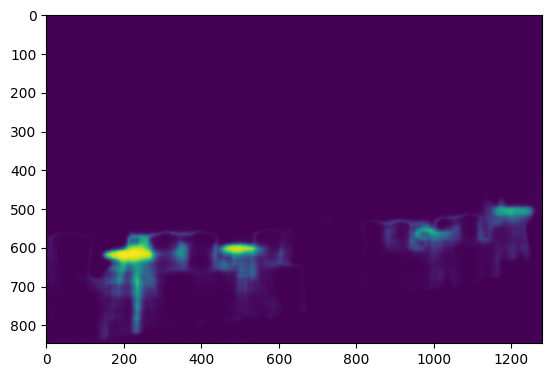

In [35]:


normalized_masks = output.softmax(dim=1)
print(class_to_idx["diningtable"])
mask = normalized_masks[0, class_to_idx["diningtable"]].detach().cpu().numpy()
plt.imshow(mask)
plt.show()



In [24]:
print(output.shape)
print(output.squeeze().shape)


torch.Size([1, 21, 847, 1280])
torch.Size([21, 847, 1280])
(847, 1280)
(847, 1280)


In [ ]:
print(pred_mask[808:811, 108:111])


[[9 9 0]
 [9 0 0]
 [0 0 0]]


tensor([[9, 9, 0],
        [9, 0, 0],
        [0, 0, 0]])